# 3주차 KNN 정규세션 과제 - 16기 김주호

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 데이터 불러오기

In [774]:
import pandas as pd
df = pd.read_csv("C:/Users/xnote/Desktop/투빅스/3주차/week3_KNN_Clustering/과제/blackfriday.csv", index_col = 0)
df.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780
5,1005302,P00051642,F,0-17,10,A,1,0,8,NaN,NaN,9821
6,1001348,P00000242,F,0-17,10,A,3,0,2,4.0,9.0,12707
7,1001088,P00117942,F,0-17,10,A,3,0,5,15.0,NaN,7108
8,1001088,P00200142,F,0-17,10,A,3,0,16,NaN,NaN,16521
9,1005302,P00319342,F,0-17,10,A,1,0,5,8.0,NaN,1886


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


< y > 
* **Purchase** : 구매 건수 (연속형 변수)


< x >
* User_ID : 사용자 아이디
* Product_ID : 상품 고유번호
* Gender : 성별 (범주형 변수, 명목자료)
* Age : 나이 (범주형 변수, 순서자료) / 나이는 비범주형, 이산자료지만 현재 데이터에서는 범주형, 순서자료로 보는 것이 합당해보임
* Occupation : 직업 (범주형 변수, 명목자료)
* City_Category : 지역 분류 (범주형 변수, 명목자료)
* Stay_In_Current_City_Years : 현재 거주하는 도시에 머문 햇수 (범주형 변수, 순서자료)
* Marital_Status : 결혼 여부 (범주형 변수, 명목자료)
* Product_Category_1 : 상품 카테고리_1 (범주형 변수, 명목자료)
* Product_Category_2 : 상품 카테고리_2 (범주형 변수, 명목자료)
* Product_Category_3 : 상품 카테고리_3 (범주형 변수, 명목자료)

In [23]:
# 변수들의 value_counts()
for col in df.columns:
    print(df[col].value_counts(),'\n')

1002063    12
1005795    12
1001980    11
1004344    11
1005831    10
           ..
1004939     1
1000837     1
1002876     1
1004919     1
1001471     1
Name: User_ID, Length: 2656, dtype: int64 

P00265242    21
P00220442    16
P00151742    15
P00114942    15
P00145042    15
             ..
P00259742     1
P00079642     1
P00311742     1
P00194342     1
P00237242     1
Name: Product_ID, Length: 1797, dtype: int64 

M    3765
F    1233
Name: Gender, dtype: int64 

26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64 

4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18
Name: Occupation, dtype: int64 

B    2102
C    1555
A    1341
Name: City_Category, dtype: int64 

1     1758
2      915
3      908
4+     742
0      675
Name: Stay_In_Current_City_Years, dtype: i

In [24]:
# Occupation, Product_Category_1, Product_Category_2, Product_Category_3 변수 값을 오름차순으로 정렬
for col in ['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']:
    print(df[col].value_counts().index.sort_values(),'\n')

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64') 

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64') 

Float64Index([ 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0,
              13.0, 14.0, 15.0, 16.0, 17.0, 18.0],
             dtype='float64') 

Float64Index([ 3.0,  4.0,  5.0,  6.0,  8.0,  9.0, 10.0, 11.0, 12.0, 13.0, 14.0,
              15.0, 16.0, 17.0, 18.0],
             dtype='float64') 



In [33]:
# 상품 아이디가 같은 카테고리를 보면 결측치가 정보의 유실이 아닌 해당 카테고리에 속하지 않은 것을 알 수 있음.
## => 결측치를 0으로 바꾸는 것이 합당해보임
print(df[df['Product_ID']=='P00265242'][['Product_Category_1','Product_Category_2','Product_Category_3']].head(5),'\n')
print(df[df['Product_ID']=='P00220442'][['Product_Category_1','Product_Category_2','Product_Category_3']].tail(5))
df[df['Product_ID']=='P00151742'][['Product_Category_1','Product_Category_2','Product_Category_3']].sample(5)

     Product_Category_1  Product_Category_2  Product_Category_3
127                   5                 8.0                 NaN
176                   5                 8.0                 NaN
214                   5                 8.0                 NaN
249                   5                 8.0                 NaN
519                   5                 8.0                 NaN 

      Product_Category_1  Product_Category_2  Product_Category_3
3127                   5                14.0                 NaN
4437                   5                14.0                 NaN
4453                   5                14.0                 NaN
4718                   5                14.0                 NaN
4916                   5                14.0                 NaN


,Product_Category_1,Product_Category_2,Product_Category_3
3245,8,15.0,16.0
1787,8,15.0,16.0
2745,8,15.0,16.0
734,8,15.0,16.0
841,8,15.0,16.0


## 데이터 전처리

* 1. User_ID, Product_ID 열 삭제


* 2. Gender 열 0,1로 값 바꾸기


* 3. Age열은 0-17:0, 18-25:1, 26-35:2, 36-45:3, 46-50:4, 51-55:5, 55+:6로 바꾸기 (충분히 순서자료로 만들 수 있는 열은 원핫인코딩을 자제한다)


* 4. Stay_In_Current_City_Years 4+는 4로 바꾸고 수치형 변수로 변환


* 5. 상품 카테고리에 있는 결측치는 모두 0으로 바꾸기 (여기서 결측치는 정보의 누락이 아닌 해당사항 없음을 뜻하기에)


* 6. Occupation, City_Category, Product_Category_1, Product_Category_2, Product_Category_3 열들은 범주형변수이자 명목자료인데 KNN 특성상 거리기반 알고리즘이기에 컬럼의 수가 많아지고 **차원이 증가할수록 성능이 많이 떨어지므로** 현재 데이터에서는 원핫인코딩은 자제하는 것이 좋아 보인다. 따라서 위 5개의 열들은 시각화를 통해 Purchase열과의 상관도를 보고 **집단화를 통해** 열의 내용을 압축하는 것이 합당하다. 

In [868]:
import pandas as pd
df = pd.read_csv("C:/Users/xnote/Desktop/투빅스/3주차/week3_KNN_Clustering/과제/blackfriday.csv", index_col = 0)

In [869]:
# User_ID, Product_ID 열 삭제
## Product_ID의 경우, 네번째 자리까지 끊어서 상품 카테고리를 나눌 수도 있지만
## 상품 카테고리 피처가 3개나 있으므로 이 열은 삭제하는 것이 나아보임
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [870]:
# Gender 값 변경
di={'M':1,'F':0}
df['Gender']=df['Gender'].map(di)

In [871]:
df.Gender.value_counts()

1    3765
0    1233
Name: Gender, dtype: int64

In [872]:
# Age 열 순서자료로 변경
dict_age={'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
df.replace({'Age':dict_age},inplace=True)
df.Age.sample(10)

1820    2
2486    2
4168    4
2916    2
3660    3
4094    4
2735    2
526     1
4344    4
4570    5
Name: Age, dtype: int64

In [873]:
# Stay_In_Current_City_Years 수치형 변수로 변환
dict_sy={'0':0, '1':1, '2':2, '3':3, '4+':4}
df.replace({'Stay_In_Current_City_Years':dict_sy},inplace=True)
df[df['Stay_In_Current_City_Years']==4]

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
16,0,0,19,B,4,0,8,11.0,NaN,2021
17,0,0,19,B,4,0,3,4.0,NaN,11013
19,0,0,19,B,4,0,2,4.0,8.0,3428
37,0,0,10,C,4,0,5,14.0,NaN,8889
45,0,0,10,C,4,0,4,5.0,NaN,2175
...,...,...,...,...,...,...,...,...,...,...
4932,1,6,7,C,4,1,8,NaN,NaN,7879
4941,1,6,13,C,4,1,1,6.0,8.0,19563
4942,1,6,11,C,4,1,1,8.0,NaN,19590
4946,1,6,13,C,4,1,5,NaN,NaN,6961


In [874]:
# 모든 결측치는 0으로 바꾸기
df=df.fillna(0)

In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      4998 non-null   int64  
 1   Age                         4998 non-null   int64  
 2   Occupation                  4998 non-null   int64  
 3   City_Category               4998 non-null   object 
 4   Stay_In_Current_City_Years  4998 non-null   int64  
 5   Marital_Status              4998 non-null   int64  
 6   Product_Category_1          4998 non-null   int64  
 7   Product_Category_2          4998 non-null   float64
 8   Product_Category_3          4998 non-null   float64
 9   Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 429.5+ KB


### 데이터 집단화를 위한 시각화

#### 직업 변수

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

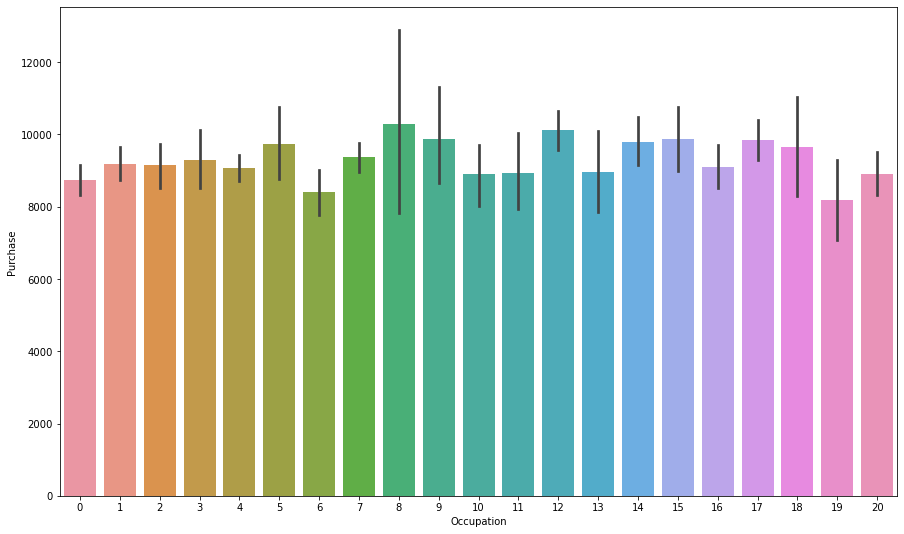

In [876]:
# 직업별 Purchase
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,9))
sns.barplot(x='Occupation',y='Purchase',data=df)

In [877]:
# 직업별 구매량의 평균값과 중앙값을 평균하여 occu_purchase를 만들고 이를 기준으로 범주화시도
import numpy as np
a=df.groupby('Occupation').agg(['mean','median'])['Purchase']
a['occu_purchase']=(a['mean']+a['median'])/2
a=a.sort_values(by='occu_purchase').reset_index()
print(a.Occupation.values)
a

[19  6  0 11 20 10 13 16  2  4  1  3  7  5  9 15 18 17 14 12  8]


,Occupation,mean,median,occu_purchase
0,19,8170.465753,6945.0,7557.732877
1,6,8402.354839,7829.0,8115.677419
2,0,8732.351399,7849.5,8290.925699
3,11,8925.147368,7813.0,8369.073684
4,20,8900.733333,7970.0,8435.366667
5,10,8897.926230,8071.0,8484.463115
6,13,8964.907692,8035.0,8499.953846
7,16,9102.409836,7927.0,8514.704918
8,2,9144.904382,7976.0,8560.452191
9,4,9066.113314,8062.0,8564.056657


- **직업은 income과 직결되는 변수**로 생각하고 위 코드에서는 직업의 구매량 평균뿐만 아니라 **중앙값도 고려**함으로써 직업별 구매량 ranking이 **이상치에 비교적 적게 영향**을 받을 수 있도록 하였다.


- 하지만 직업별 구매량 차이가 뚜렷하지 않아 직업 변수는 추후에 성능을 비교하며 드랍할 가능성도 있어 보인다.


- 직업별 구매량의 평균과 중앙값을 구하고, 그 평균를 구한다. 두 결과값의 평균값을 기준으로 직업의 구매도를 정렬하고 적당한 경계를 정해 직업별 3가지의 범주를 만들었다(집단화). 이후 원핫인코딩을 하더라도 차원이 지나치게 커지는 상황을 방지하고자 3개의 집단으로 최대한 열 정보를 압축했다.

In [878]:
# 직업 변수 집단화
dict_occ={(19,6,0,11):'a', (20,10,13,16,2,4,1,3,7):'b', (5,9,15,18,17,14,12,8):'c'}
df=df.replace({'Occupation':dict_occ})

In [879]:
df.Occupation.value_counts()

b    2828
c    1244
a     926
Name: Occupation, dtype: int64

#### 도시 변수

In [880]:
# City_Categery별 Purchase의 평균값과 중앙값
df.groupby('City_Category').agg(['mean','median'])['Purchase']

,mean,median
City_Category,,
A,8893.628635,7946
B,8957.090390,7994
C,9903.953698,8628


<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

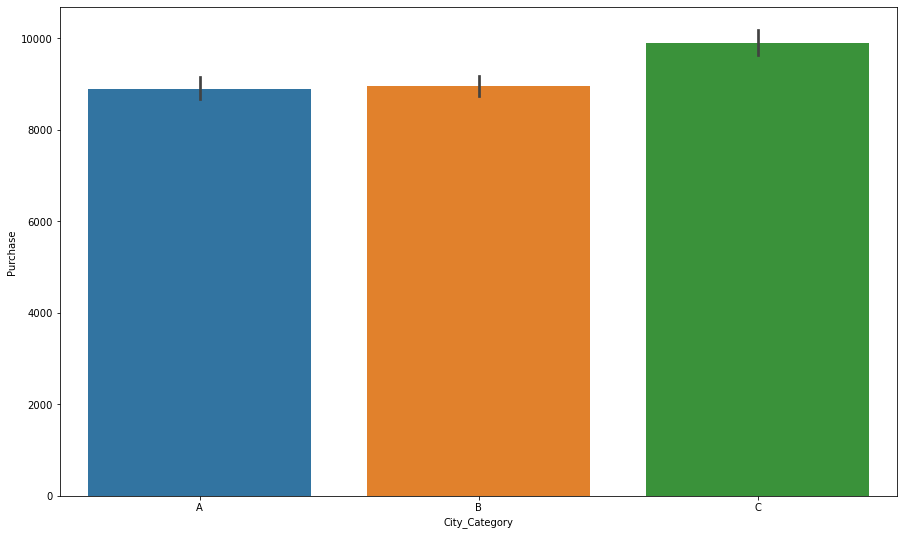

In [881]:
# 거주하는 도시별 Purchase
fig=plt.figure(figsize=(15,9))
sns.barplot(x='City_Category',y='Purchase',data=df)

City_Category열의 경우, 구매량의 평균과 중앙값이 A<B<C 순서로 많다. 범주형으로 그대로 두면 되지만 막대그래프를 보면 A와 B 도시는 거의 차이가 없는 반면, C도시만 차이가 있다. 따라서, **A,B도시는 0, C도시는 1로 값을 변경**하여 원핫인코딩으로 인한 불필요한 차원의 증가를 줄인다.

In [882]:
# City_Category 값 대체
df['City_Category'] = df['City_Category'].replace(['A','B','C'],[0,0,1])
df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,b,0,3,0,5,17.0,0.0,2010
1,0,0,b,0,1,0,7,0.0,0.0,4483
2,0,0,b,0,1,0,1,4.0,0.0,7696
3,0,0,b,0,3,0,2,4.0,0.0,16429
4,0,0,b,0,3,0,3,5.0,0.0,5780


In [883]:
df.City_Category.value_counts()

0    3443
1    1555
Name: City_Category, dtype: int64

#### 상품 카테고리 변수

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

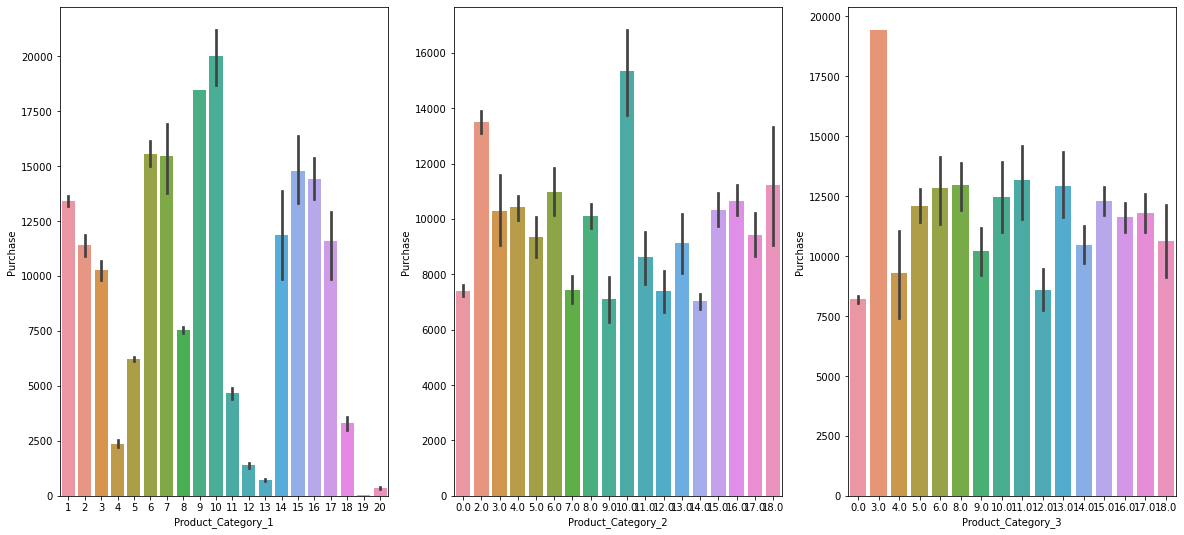

In [884]:
# Product_category별 Purchase 시각화
fig=plt.figure(figsize=(20,9))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.barplot(x='Product_Category_1',y='Purchase',data=df,ax=ax1)
sns.barplot(x='Product_Category_2',y='Purchase',data=df,ax=ax2)
sns.barplot(x='Product_Category_3',y='Purchase',data=df,ax=ax3)

시각화를 보면 카테고리별 구매량 차이가 많이 나는 **Product_Category_1이 상대적으로 중요한 변수임**을 알 수 있다. 

따라서, 첫번째 카테고리는 직업열처럼 세가지 범주로 집단화를 하고 두, 세번째 카테고리는 도시열처럼 0,1로 값을 변경하도록 한다.

In [885]:
# 상품 카테고리_1 구매량의 평균값과 중앙값을 평균하여 occu_purchase를 만들고 이를 기준으로 범주화시도
import numpy as np
a_1=df.groupby('Product_Category_1').agg(['mean','median'])['Purchase']
a_1['1_purchase']=(a_1['mean']+a_1['median'])/2
a_1=a_1.sort_values(by='1_purchase').reset_index()
print(a_1.Product_Category_1.values)
a_1

[19 20 13 12  4 18 11  5  8  3 14  2 17 16  1 15  6  7  9 10]


,Product_Category_1,mean,median,1_purchase
0,19,39.850000,37.5,38.675000
1,20,361.580645,367.0,364.290323
2,13,714.860465,754.0,734.430233
3,12,1403.967742,1413.0,1408.483871
4,4,2368.682243,2176.0,2272.341121
5,18,3310.500000,3753.0,3531.750000
6,11,4671.737864,4645.0,4658.368932
7,5,6230.106610,6897.0,6563.553305
8,8,7543.062312,7926.0,7734.531156
9,3,10257.595855,10819.0,10538.297927


In [887]:
#상품 카테고리_1 변수 범주화
dict_1={(19,20,13,12,4):'a', (18,11,5,8):'b', (3,14,2,17,16,1):'c', (15,6,7,9,10):'d'}
df=df.replace({'Product_Category_1':dict_1})

In [888]:
# 범주를 3개로도 변경했으나 KNN 성능이 떨어짐을 확인함. 4개 정도의 범주가 적당한 것으로 보임.
# dict_1={(19,20,13,12,4,18):'a', (11,5,8,3,14,2,17):'b', (16,1,15,6,7,9,10):'c'}
# df=df.replace({'Product_Category_1':dict_1})

In [889]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,b,0,3,0,b,17.0,0.0,2010
1,0,0,b,0,1,0,d,0.0,0.0,4483
2,0,0,b,0,1,0,c,4.0,0.0,7696
3,0,0,b,0,3,0,c,4.0,0.0,16429
4,0,0,b,0,3,0,c,5.0,0.0,5780


[14.  9.  7.  0. 12. 11. 13. 17.  8.  5.  6. 15.  3. 16.  4. 18.  2. 10.]


,Product_Category_2,mean,median,2_purchase
0,14.0,7022.177419,6997.0,7009.588710
1,9.0,7100.307692,6971.0,7035.653846
2,7.0,7442.000000,7001.0,7221.500000
3,0.0,7394.652968,7071.0,7232.826484
4,12.0,7397.175000,7424.5,7410.837500
5,11.0,8623.581818,7044.0,7833.790909
6,13.0,9130.029412,7932.0,8531.014706
7,17.0,9426.340909,8171.5,8798.920455
8,8.0,10109.697279,8654.5,9382.098639
9,5.0,9339.046512,10101.5,9720.273256


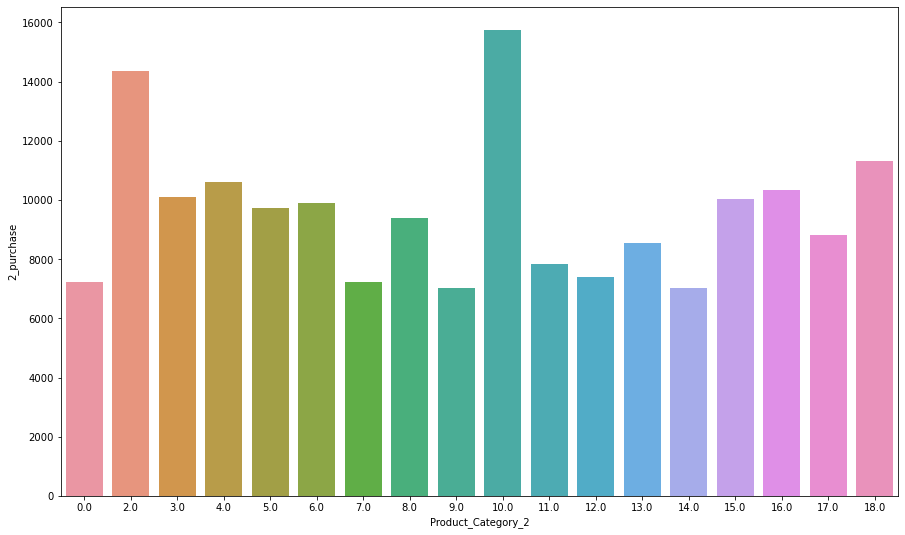

In [890]:
# 상품 카테고리_2 구매량의 평균값과 중앙값을 평균하여 occu_purchase를 만들고 이를 기준으로 범주화시도
a_2=df.groupby('Product_Category_2').agg(['mean','median'])['Purchase']
a_2['2_purchase']=(a_2['mean']+a_2['median'])/2
a_2=a_2.sort_values(by='2_purchase').reset_index()
print(a_2.Product_Category_2.values)

fig=plt.figure(figsize=(15,9))
sns.barplot(x='Product_Category_2',y='2_purchase',data=a_2)
a_2

In [891]:
# 상품 카테고리_2 값 변환
df['Product_Category_2'] = df['Product_Category_2'].replace(a_2.Product_Category_2.tolist()[:8], 0)
df['Product_Category_2'] = df['Product_Category_2'].replace(a_2.Product_Category_2.tolist()[8:], 1)

In [892]:
df.Product_Category_2

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
4993    1.0
4994    0.0
4995    1.0
4996    0.0
4997    0.0
Name: Product_Category_2, Length: 4998, dtype: float64

[ 0. 12.  4. 14.  9. 18. 17. 16.  5. 15. 13. 10.  6. 11.  8.  3.]


,Product_Category_3,mean,median,3_purchase
0,0.0,8197.637522,7441.0,7819.318761
1,12.0,8572.572917,8227.0,8399.786458
2,4.0,9283.176471,9877.0,9580.088235
3,14.0,10457.351852,9601.5,10029.425926
4,9.0,10214.066667,11525.0,10869.533333
5,18.0,10613.772727,11831.0,11222.386364
6,17.0,11802.705479,11476.5,11639.602740
7,16.0,11631.490566,11838.5,11734.995283
8,5.0,12105.435714,11812.0,11958.717857
9,15.0,12310.292308,11992.0,12151.146154


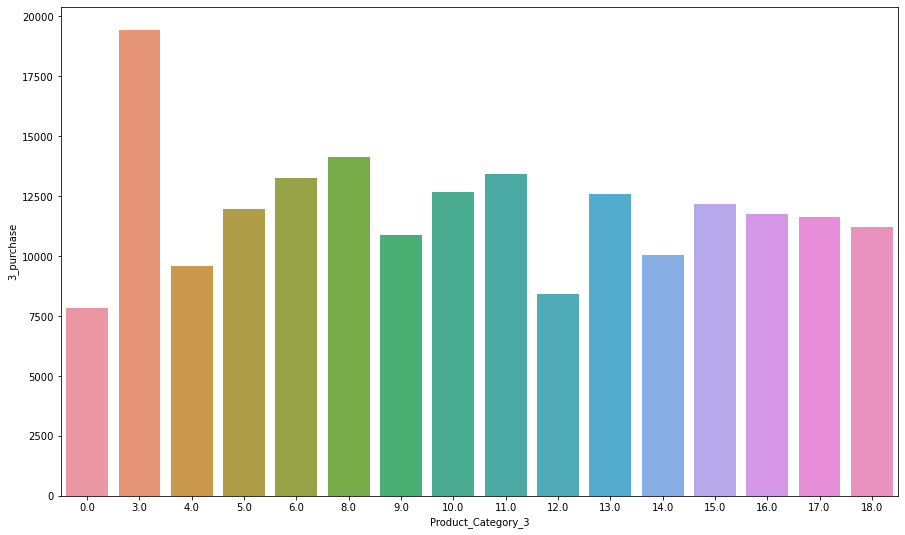

In [893]:
# 상품 카테고리_3 구매량의 평균값과 중앙값을 평균하여 occu_purchase를 만들고 이를 기준으로 범주화시도
a_3=df.groupby('Product_Category_3').agg(['mean','median'])['Purchase']
a_3['3_purchase']=(a_3['mean']+a_3['median'])/2
a_3=a_3.sort_values(by='3_purchase').reset_index()
print(a_3.Product_Category_3.values)

fig=plt.figure(figsize=(15,9))
sns.barplot(x='Product_Category_3',y='3_purchase',data=a_3)
a_3

In [894]:
df['Product_Category_3'] = df['Product_Category_3'].replace(a_3.Product_Category_3.tolist()[:5], 0)
df['Product_Category_3'] = df['Product_Category_3'].replace(a_3.Product_Category_3.tolist()[5:], 1)

In [895]:
# 상품 카테고리 3개 잘 변경된 것 확인
df.Product_Category_3.value_counts()

0.0    3834
1.0    1164
Name: Product_Category_3, dtype: int64

### 원핫인코딩

In [896]:
import pandas as pd
df=pd.get_dummies(df)
df

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Purchase,Occupation_a,Occupation_b,Occupation_c,Product_Category_1_a,Product_Category_1_b,Product_Category_1_c,Product_Category_1_d
0,0,0,0,3,0,0.0,0.0,2010,0,1,0,0,1,0,0
1,0,0,0,1,0,0.0,0.0,4483,0,1,0,0,0,0,1
2,0,0,0,1,0,1.0,0.0,7696,0,1,0,0,0,1,0
3,0,0,0,3,0,1.0,0.0,16429,0,1,0,0,0,1,0
4,0,0,0,3,0,1.0,0.0,5780,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,6,1,1,1,1.0,0.0,11701,0,1,0,0,0,1,0
4994,1,6,1,1,1,0.0,0.0,2045,0,1,0,0,1,0,0
4995,1,6,1,3,1,1.0,0.0,4505,0,1,0,0,0,1,0
4996,1,6,1,2,1,0.0,0.0,1413,1,0,0,1,0,0,0


## KNN 실습

In [908]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

X_features=df.drop('Purchase',axis=1)
y_target=df.Purchase

X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=156)

k_list=[i for i in range(1,100) if i%2==1]
cv_scores=[]
for k in tqdm(k_list):
    regressor=KNeighborsRegressor(n_neighbors=k, p=2) # p=2: euclidean_distance
    scores=cross_val_score(regressor,X_train,y_train,cv=10,scoring='r2')
    cv_scores.append(scores.mean())

best_k=k_list[np.argsort(cv_scores)[-1]] # cv_scores에서 가장 높은 성능을 낸 k값 인덱싱
print('최적의 k값:',best_k)
print('최적의 k에 대한 r2 값:',np.max(cv_scores))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:16<00:00,  3.12it/s]

최적의 k값: 11
최적의 k에 대한 r2 값: 0.4697621438986889


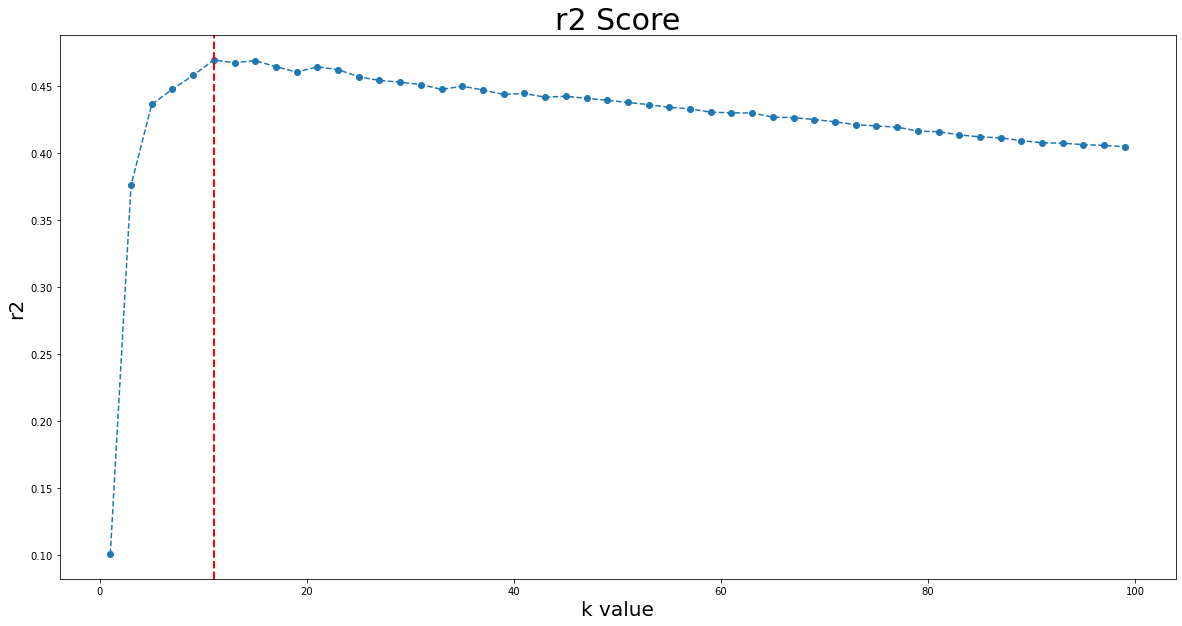

In [909]:
plt.figure(figsize=(20,10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('k value', fontsize=20)
plt.ylabel('r2', fontsize=20)
plt.title('r2 Score', fontsize=30)
plt.axvline(best_k, color='r', linestyle='--', linewidth=2)
plt.show()

현재 열이 15개로 조금 많다. 이 부분에 있어 전처리하면서 상대적으로 덜 중요했던 상품 카테고리_3 변수와 직업 변수를 드랍시키고 다시 성능을 측정해보자.

In [910]:
df2=df.copy()
df2.drop(['Occupation_a','Occupation_b','Occupation_c','Product_Category_3'],axis=1,inplace=True)

In [911]:
df2

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Purchase,Product_Category_1_a,Product_Category_1_b,Product_Category_1_c,Product_Category_1_d
0,0,0,0,3,0,0.0,2010,0,1,0,0
1,0,0,0,1,0,0.0,4483,0,0,0,1
2,0,0,0,1,0,1.0,7696,0,0,1,0
3,0,0,0,3,0,1.0,16429,0,0,1,0
4,0,0,0,3,0,1.0,5780,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4993,1,6,1,1,1,1.0,11701,0,0,1,0
4994,1,6,1,1,1,0.0,2045,0,1,0,0
4995,1,6,1,3,1,1.0,4505,0,0,1,0
4996,1,6,1,2,1,0.0,1413,1,0,0,0


In [912]:
X_features=df2.drop('Purchase',axis=1)
y_target=df2.Purchase

X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=156)

k_list=[i for i in range(1,100) if i%2==1]
cv_scores=[]
for k in tqdm(k_list):
    regressor=KNeighborsRegressor(n_neighbors=k, p=2) # p=2: euclidean_distance
    scores=cross_val_score(regressor,X_train,y_train,cv=10,scoring='r2')
    cv_scores.append(scores.mean())

best_k=k_list[np.argsort(cv_scores)[-1]] # cv_scores에서 가장 높은 성능을 낸 k값 인덱싱
print('최적의 k값:',best_k)
print('최적의 k에 대한 r2 값:',np.max(cv_scores))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  4.09it/s]

최적의 k값: 13
최적의 k에 대한 r2 값: 0.5088149310685696


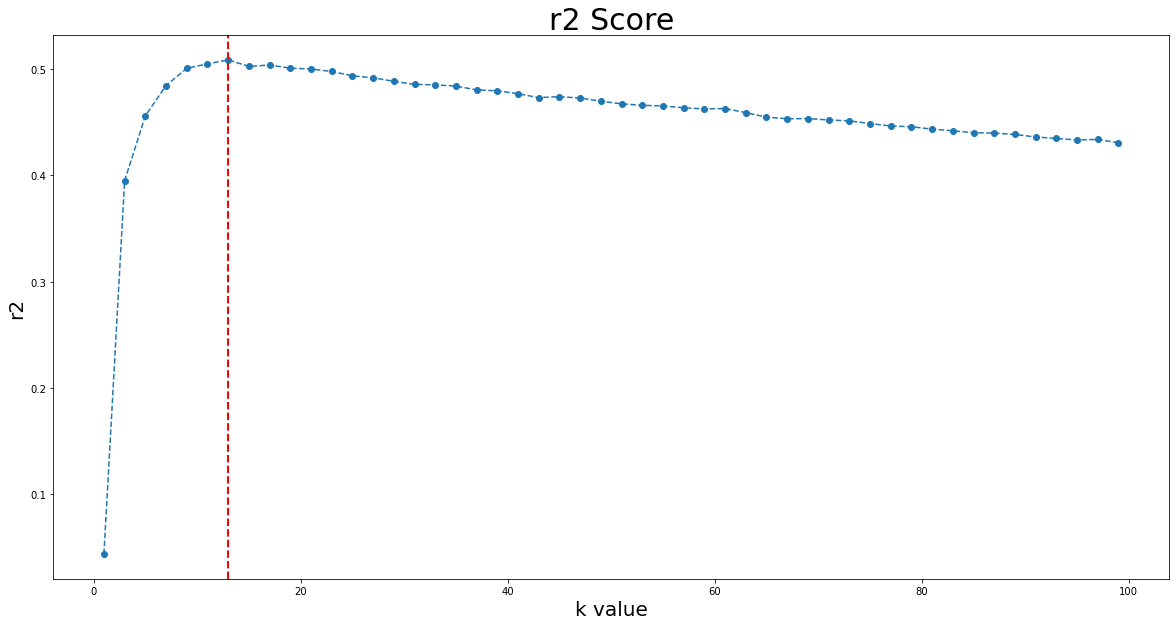

In [913]:
plt.figure(figsize=(20,10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('k value', fontsize=20)
plt.ylabel('r2', fontsize=20)
plt.title('r2 Score', fontsize=30)
plt.axvline(best_k, color='r', linestyle='--', linewidth=2)
plt.show()

성능이 약 4%포인트 정도 올랐다!

### r2 score vs adjusted r2 score 비교

In [914]:
# adjusted r2 score
cv_adj_scores=[]
for s in cv_scores:
    a=1-(1-s)*(len(y_target)-1)/(len(y_target)-X_features.shape[1]-1)
    cv_adj_scores.append(a)
print(np.max(cv_adj_scores))
best_k=k_list[np.argsort(cv_adj_scores)[-1]]
print('최적의 k값:',best_k)

0.507830000110215
최적의 k값: 13


In [915]:
# r2 score
print(np.max(cv_scores))
best_k=k_list[np.argsort(cv_scores)[-1]]
print('최적의 k값:',best_k)

0.5088149310685696
최적의 k값: 13


- 가중치를 부여한 KNN regressor

In [916]:
k_list=[i for i in range(1,100) if i%2==1]
cv_scores=[]
for k in tqdm(k_list):
    regressor=KNeighborsRegressor(n_neighbors=k, p=2, weights='distance') # p=2: euclidean_distance
    scores=cross_val_score(regressor,X_train,y_train,cv=10,scoring='r2')
    cv_scores.append(scores.mean())

best_k=k_list[np.argsort(cv_scores)[-1]] # cv_scores에서 가장 높은 성능을 낸 k값 인덱싱
print('최적의 k값:',best_k)
print('최적의 k에 대한 r2 값:',np.max(cv_scores))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  3.98it/s]

최적의 k값: 13
최적의 k에 대한 r2 값: 0.4201455327521838


거리에 대한 가중치를 부여한 모델은 성능이 다소 떨어진 것을 확인할 수 있다.

### 타겟변수 로그변환

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

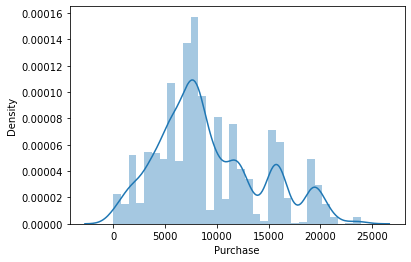

In [918]:
sns.distplot(df2['Purchase'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

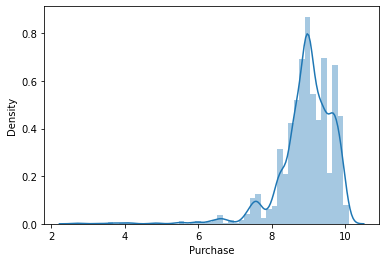

In [919]:
df3=df2.copy()
df3.Purchase=np.log1p(df3.Purchase)
sns.distplot(df3['Purchase'])

In [920]:
X_features=df3.drop('Purchase',axis=1)
y_target=df3.Purchase

X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=156)

k_list=[i for i in range(1,100) if i%2==1]
cv_scores=[]
for k in tqdm(k_list):
    regressor=KNeighborsRegressor(n_neighbors=k, p=2) # p=2: euclidean_distance, p=1: manhattan_distance, p=l_p: minkowski_distance
    scores=cross_val_score(regressor,X_train,y_train,cv=10,scoring='r2')
    cv_scores.append(scores.mean())

best_k=k_list[np.argsort(cv_scores)[-1]] # cv_scores에서 가장 높은 성능을 낸 k값 인덱싱
print('최적의 k값:',best_k)
print('최적의 k에 대한 r2 값:',np.max(cv_scores))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:11<00:00,  4.22it/s]

최적의 k값: 9
최적의 k에 대한 r2 값: 0.515102205909083


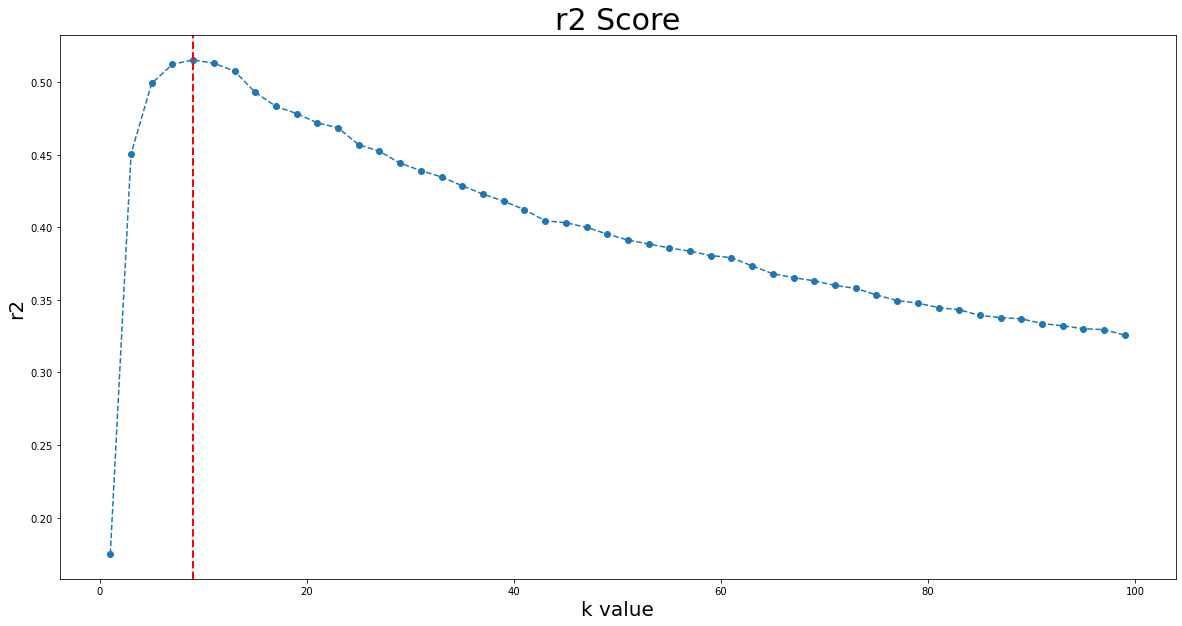

In [921]:
plt.figure(figsize=(20,10))
plt.plot(k_list, cv_scores, marker='o', linestyle='dashed')
plt.xlabel('k value', fontsize=20)
plt.ylabel('r2', fontsize=20)
plt.title('r2 Score', fontsize=30)
plt.axvline(best_k, color='r', linestyle='--', linewidth=2)
plt.show()

타겟변수를 로그변환하여 정규화를 시도하니 성능이 약 1%포인트 정도 오른 것을 볼 수 있다.

In [922]:
# 유클리디안 거리에 대한 가중치를 더해 구한 KNN Regressor의 성능
k_list=[i for i in range(1,100) if i%2==1]
cv_scores=[]
for k in tqdm(k_list):
    regressor=KNeighborsRegressor(n_neighbors=k, p=2, weights='distance') # p=2: euclidean_distance
    scores=cross_val_score(regressor,X_train,y_train,cv=10,scoring='r2')
    cv_scores.append(scores.mean())

best_k=k_list[np.argsort(cv_scores)[-1]] # cv_scores에서 가장 높은 성능을 낸 k값 인덱싱
print('최적의 k값:',best_k)
print('최적의 k에 대한 r2 값:',np.max(cv_scores))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  3.91it/s]

최적의 k값: 9
최적의 k에 대한 r2 값: 0.4586527452215153


In [928]:
# 맨하튼 거리를 이용한 KNN Regressor (가중치 없는게 더 성능이 좋음)
k_list=[i for i in range(1,100) if i%2==1]
cv_scores=[]
for k in tqdm(k_list):
    regressor=KNeighborsRegressor(n_neighbors=k, p=1) # p=2: euclidean_distance, p=1: manhattan_distance, p=l_p: minkowski_distance
    scores=cross_val_score(regressor,X_train,y_train,cv=10,scoring='r2')
    cv_scores.append(scores.mean())

best_k=k_list[np.argsort(cv_scores)[-1]] # cv_scores에서 가장 높은 성능을 낸 k값 인덱싱
print('최적의 k값:',best_k)
print('최적의 k에 대한 r2 값:',np.max(cv_scores))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:12<00:00,  3.95it/s]

최적의 k값: 9
최적의 k에 대한 r2 값: 0.521819495702524


## 결론 및 한계점

#### 데이터 전처리
1. User_ID, Product_ID 열 삭제하고, Gender 열 0,1로 값을 바꿈.


2. Age열은 0-17:0, 18-25:1, 26-35:2, 36-45:3, 46-50:4, 51-55:5, 55+:6로 값을 바꿔 충분히 순서자료로 만들 수 있는 열은 원핫인코딩을 자제함.


3. Stay_In_Current_City_Years열의 4+는 4로 바꾸고 수치형 변수로 변환함.


4. 상품 카테고리에 있는 결측치는 모두 0으로 바꿈. (여기서 결측치는 정보의 누락이 아닌 해당사항 없음을 뜻하기에)


5. Occupation, City_Category, Product_Category_1, Product_Category_2, Product_Category_3 열들은 범주의 집단화를 통해 열의 정보를 압축함.


6. 집단화된 열에 대해서는 원핫인코딩을 하여 총 15개의 열을 만듦.


7. 이후 성능을 비교하니 Occupation과 Product_Category_3열은 제거했을 때 성능이 개선되어 두 열 변수 관련 피처는 삭제해주어 총 11개의 열로 모델을 돌림.

#### KNN 실습
1. 1~99까지의 홀수를 k값의 후보로 넣고 루프를 돌려 최적의 k값을 도출함.


2. 최적의 k값에 대한 성능과 k값의 변화에 따른 성능 변화를 시각화함.


3. r2 점수와 조정된 r2 점수를 비교했으며 거리에 따른 가중치를 부여한 모델도 구축해봄.


4. 거리에 대한 측도로는 맨하튼 거리와 유클리드 거리를 사용했고, 성능은 가중치 없이 맨하튼 거리를 사용한 KNN Regressor모델이 가장 좋았음.


#### 한계점 및 개선점
- 처음에는 Occupation, City_Category, Product_Category_1, Product_Category_2, Product_Category_3 각 열에 대해 구매량 순위(평균값의 순위와 중앙값의 순위를 평균한 최종순위)를 구하고 이를 그대로 변수에 넣었다. 당연히 성능이 0.65정도로 높았지만 각 열의 구매량은 각 변수가 가진 의미를 많이 잃어버린다고 판단해 최종적으로는 범주의 집단화를 통해 성능을 최대한 높였다. 하지만 이 부분도 결국 구매량에 대한 순위를 반영한 범주이기에 의도적으로 성능을 높이는 전처리로 볼 수 있다는 한계점이 있다.


- r2 점수뿐만 아니라 neg_mean_sqaured_error 도 평가지표로 구해봤으면 더 좋았을 것 같다